Patrick Jean-Baptiste

The CUNY Graduate Center

# Description: Emotion Image Extraction & Collection

This notebook extracts the speaker's face in every video in the RAVDESS dataset and collects the images in an array. The label indicating the type of emotion expressed in the image is also stored in a separate array.

In [1]:
import numpy as np
import cv2
import os
import csv
import matplotlib.pyplot as plt

from preprocess_video import preprocess_video
from detection_and_extraction import detection_and_extraction

Create a face detector by loading a pre-trained classifier for faces.

In [2]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

Extract and collect the images of expressed emotion along with the corresponding labels.

In [3]:
main_dir = "E:"

Emotion_Images = []
Emotion_Labels = []
Emotion_Image_Data = []

# For every actor in the directory.
for actor_num, actor in enumerate(os.listdir(main_dir)):

    if (actor_num > 0):
        
        # Retrieve the name of the video directory for an actor.
        actor_dir = os.listdir(os.path.join(main_dir, actor))
        vid_dir = (main_dir + '/' + actor + '/' + actor_dir[0])
        
        # For every video in the video directory.
        for idx, vid_file in enumerate(os.listdir(vid_dir)):

            # Perform the video preprocessing for retrieving a
            # grayscale video frame.
            gray_frame = preprocess_video(os.path.join(vid_dir, vid_file))

            # Detect and extract the face in the video frame.
            face_img = detection_and_extraction(gray_frame, face_cascade, 128)

            # Append the image of the extracted face to an array.
            Emotion_Images.append(face_img)

            # Append the label indicating the type of emotion 
            # expressed to an array.
            Emotion_Labels.append(vid_file[7])  

            # Append the image data including the name of the
            # video as well as the label to an array.
            Emotion_Image_Data.append([vid_file[0:-4], vid_file[7]])
   
            # Save the image of the extracted face in a folder.
            cv2.imwrite("Emotion_Images/" + vid_file[0:-4] + ".jpg", face_img)
        
        

Save the emotion image data as a .csv file.

In [4]:
with open('emotion_image_data.csv','w', newline='') as file:
    
    writer = csv.writer(file)

    for file_name, label in Emotion_Image_Data:
                
        writer.writerow([str(file_name), str(label)])

Print the shape of the array containing the images of expressed emotion.

In [5]:
Emotion_Images = np.array(Emotion_Images)

print(Emotion_Images.shape)

(4890, 128, 128)


Print the shape of the array containing the labels that correspond to the types of emotion expressed.

In [6]:
Emotion_Labels = np.array(Emotion_Labels)

print(Emotion_Labels.shape)

(4890,)


Display sample images along with the corresponding labels that indicate the type of emotion expressed in the images.

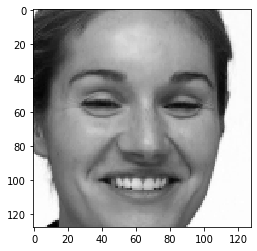

Label: 3


In [7]:
plt.imshow(Emotion_Images[76], cmap='gray')
plt.show()

print("Label: %s" % (Emotion_Labels[76])) 

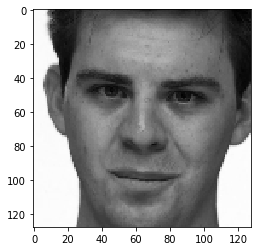

Label: 8


In [8]:
plt.imshow(Emotion_Images[478], cmap='gray')
plt.show()

print("Label: %s" % (Emotion_Labels[478])) 

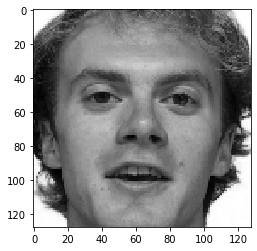

Label: 2


In [9]:
plt.imshow(Emotion_Images[1211], cmap='gray')
plt.show()

print("Label: %s" % (Emotion_Labels[1211])) 

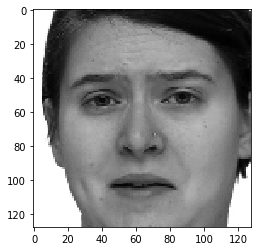

Label: 6


In [10]:
plt.imshow(Emotion_Images[2560], cmap='gray')
plt.show()

print("Label: %s" % (Emotion_Labels[2560])) 